## TF

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pylab as plt

import numpy as np
import os

## Parameter Setting

In [2]:
learning_rate = 0.001
epochs = 50
batch_size=64

## Load Data

In [3]:
(train_image, train_label), (test_image, test_label) = mnist.load_data()

train_image = train_image.astype(np.float32)
test_image = test_image.astype(np.float32)

train_image = np.expand_dims(train_image, axis=1)
test_image = np.expand_dims(test_image, axis=1)

train_label = to_categorical(train_label, 10)
test_label = to_categorical(test_label, 10)

train_data = tf.data.Dataset.from_tensor_slices((train_image, train_label)).shuffle(buffer_size=1000000).batch(batch_size)
test_data = tf.data.Dataset.from_tensor_slices((test_image, test_label)).batch(batch_size)

<class 'numpy.ndarray'>
(28, 28)


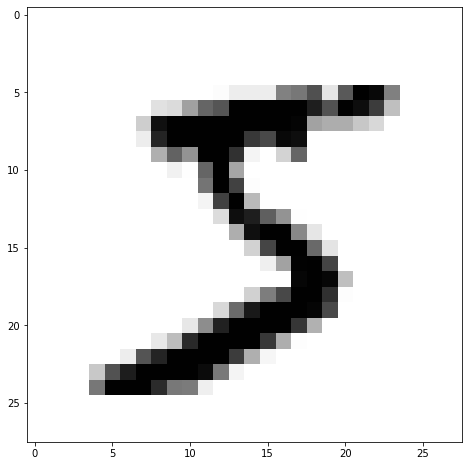

In [4]:
img = train_image[0].reshape([28,28])
print(type(img))
print(img.shape)
plt.figure(figsize=(8,8))
plt.imshow(img, cmap='gray_r')
plt.show()
print(img)

## Model setting

In [5]:
ip = keras.Input(shape=(1,28,28))

# First Conv
conv1 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=1, padding='same', activation=tf.nn.relu)(ip)
pool1 = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(conv1)
norm1 = tf.nn.local_response_normalization(pool1, depth_radius=4, bias=1.0, alpha=0.001/9.0, beta=0.75)
drop1 = keras.layers.Dropout(0.8)(norm1)

# Second Conv
conv2 = keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=1, padding='same', activation=tf.nn.relu)(drop1)
pool2 = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(conv2)
norm2 = tf.nn.local_response_normalization(pool2, depth_radius=4, bias=1.0, alpha=0.001/9.0, beta=0.75)
drop2 = keras.layers.Dropout(0.8)(norm2)

# Third Conv
conv3 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same', activation=tf.nn.relu)(drop2)
pool3 = keras.layers.MaxPool2D(pool_size=(2,2), padding='same')(conv3)
norm3 = tf.nn.local_response_normalization(pool3, depth_radius=4, bias=1.0, alpha=0.001/9.0, beta=0.75)
drop3 = keras.layers.Dropout(0.8)(norm3)

# Fully Connected
flat = keras.layers.Flatten()(drop3)
dense1 = keras.layers.Dense(units = 1024, activation = tf.nn.relu)(flat)
dense2 = keras.layers.Dense(units = 1024, activation = tf.nn.relu)(dense1)

# Output
op = keras.layers.Dense(units=10, activation = tf.nn.softmax)(dense2)
model = keras.Model(ip, op)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 28, 28)]       0         
                                                                 
 conv2d (Conv2D)             (None, 1, 28, 64)         16192     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 14, 64)        0         
 )                                                               
                                                                 
 tf.nn.local_response_normal  (None, 1, 14, 64)        0         
 ization (TFOpLambda)                                            
                                                                 
 dropout (Dropout)           (None, 1, 14, 64)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 14, 128)        73856 

## Fit

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_image, train_label, epochs=epochs)

Epoch 1/50
1875/1875 [==============================] - 14s 5ms/step - loss: 2.2505 - accuracy: 0.2695
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0609 - accuracy: 0.6210
Epoch 3/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8149 - accuracy: 0.7319
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7231 - accuracy: 0.7714
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6638 - accuracy: 0.7963
Epoch 6/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6282 - accuracy: 0.8105
Epoch 7/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6150 - accuracy: 0.8145
Epoch 8/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5902 - accuracy: 0.8233
Epoch 9/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5797 - accuracy: 0.8267
Epoch 10/50
1875/1875 [==============================] - 10s 5ms/step - l

## Graph

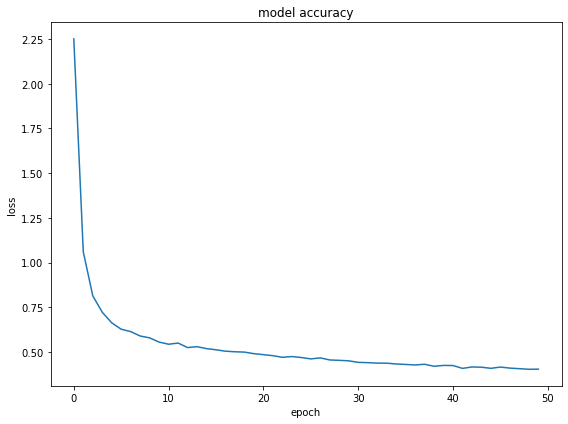

In [13]:
plt.figure(figsize=(8,6))
plt.title('model loss')

plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

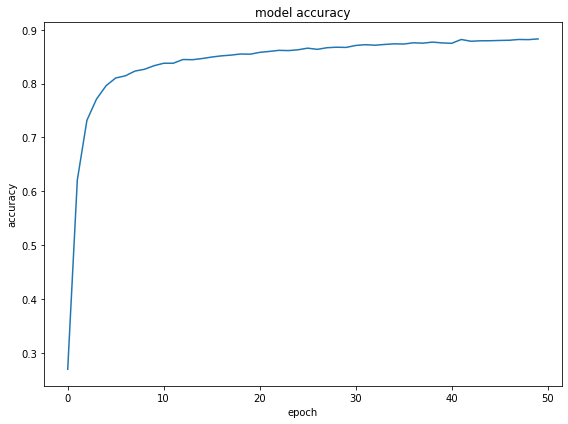

In [14]:
plt.figure(figsize=(8,6))
plt.title('model accuracy')

plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.tight_layout()
plt.show()

## Evaluate

In [15]:
test_loss, test_acc = model.evaluate(test_image, test_label)

313/313 [==============================] - 2s 4ms/step - loss: 0.1578 - accuracy: 0.9555
